# Figure 14 for corrigendum to 2016 JAMES Tracmip introduction paper

Data is taken from ESGF copy of TRACMIP at KIT SCC LSDFONLINE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Rectangle

# my module functions to load tracmip data, plot colors, model names etc.
import tracmip as tm

import warnings
warnings.filterwarnings("ignore")

## Load global-mean time-mean surface temperature

In [2]:
ts_aqct = np.array(np.load('./postdata_npz/ts_aquaControlTRACMIP.fldmean.timmean.npz')['ts'])
ts_aq4x = np.array(np.load('./postdata_npz/ts_aqua4xCO2TRACMIP.fldmean.timmean.npz'  )['ts'])
ts_ldct = np.array(np.load('./postdata_npz/ts_landControlTRACMIP.fldmean.timmean.npz')['ts'])
ts_ld4x = np.array(np.load('./postdata_npz/ts_land4xCO2TRACMIP.fldmean.timmean.npz'  )['ts'])
ts_ldor = np.array(np.load('./postdata_npz/ts_landOrbitTRACMIP.fldmean.timmean.npz'  )['ts'])

## Load zonal-mean monthly-mean precipitation

In [3]:
pr_aqct_mm = 86400*np.nanmean(np.array(np.load('./postdata_npz/pr_aquaControlTRACMIP.ymonmean.npz')['pr']), axis=3)
pr_aq4x_mm = 86400*np.nanmean(np.array(np.load('./postdata_npz/pr_aqua4xCO2TRACMIP.ymonmean.npz'  )['pr']), axis=3)
pr_ldct_mm = 86400*np.nanmean(np.array(np.load('./postdata_npz/pr_landControlTRACMIP.ymonmean.npz')['pr']), axis=3)
pr_ld4x_mm = 86400*np.nanmean(np.array(np.load('./postdata_npz/pr_land4xCO2TRACMIP.ymonmean.npz'  )['pr']), axis=3)

## Time-mean precipitation

In [4]:
pr_aqct_tm = np.nanmean(pr_aqct_mm, axis=1)
pr_aq4x_tm = np.nanmean(pr_aq4x_mm, axis=1)
pr_ldct_tm = np.nanmean(pr_ldct_mm, axis=1)
pr_ld4x_tm = np.nanmean(pr_ld4x_mm, axis=1)

## Calculate time-mean and monthly-mean ITCZ position

In [5]:
# my atmospheric python package for ITCZ calculation
import sys
sys.path.append('/home/fd8940/Dropbox/Python3/mymodules/')
import atmosphere as atm

In [7]:
itcz_aqct_tm = np.zeros(tm.nmod) + np.nan
itcz_aq4x_tm = np.zeros(tm.nmod) + np.nan
itcz_ldct_tm = np.zeros(tm.nmod) + np.nan
itcz_ld4x_tm = np.zeros(tm.nmod) + np.nan
for i in range(tm.nmod):
    itcz_aqct_tm[i] = atm.get_itczposition(pr_aqct_tm[i, :], tm.latint, 30, 0.1)
    itcz_aq4x_tm[i] = atm.get_itczposition(pr_aq4x_tm[i, :], tm.latint, 30, 0.1)
    itcz_ldct_tm[i] = atm.get_itczposition(pr_ldct_tm[i, :], tm.latint, 30, 0.1)
    itcz_ld4x_tm[i] = atm.get_itczposition(pr_ld4x_tm[i, :], tm.latint, 30, 0.1)

In [8]:
itcz_aqct_mm = np.zeros((tm.nmod, 12)) + np.nan
itcz_aq4x_mm = np.zeros((tm.nmod, 12)) + np.nan
itcz_ldct_mm = np.zeros((tm.nmod, 12)) + np.nan
itcz_ld4x_mm = np.zeros((tm.nmod, 12)) + np.nan
for i in range(tm.nmod):
    for t in range(0, 12):
        itcz_aqct_mm[i, t] = atm.get_itczposition(pr_aqct_mm[i, t, :], tm.latint, 30, 0.1)
        itcz_aq4x_mm[i, t] = atm.get_itczposition(pr_aq4x_mm[i, t, :], tm.latint, 30, 0.1)
        itcz_ldct_mm[i, t] = atm.get_itczposition(pr_ldct_mm[i, t, :], tm.latint, 30, 0.1)
        itcz_ld4x_mm[i, t] = atm.get_itczposition(pr_ld4x_mm[i, t, :], tm.latint, 30, 0.1)

## Plotting

In [10]:
import scipy.stats as spstats

Aqua, annual-mean: 0.543590663688 7.5577420329e-06
Aqua, southern edge: 0.816887368733 2.59889683939e-05
Aqua, northern edge: 0.304908738199 0.00199924017696
Land, annual-mean: 0.267991213807 0.0431048350358
Land, southern edge: 0.33702736224 0.0422542890906
Land, northern edge: 0.235284493673 0.0966756210714


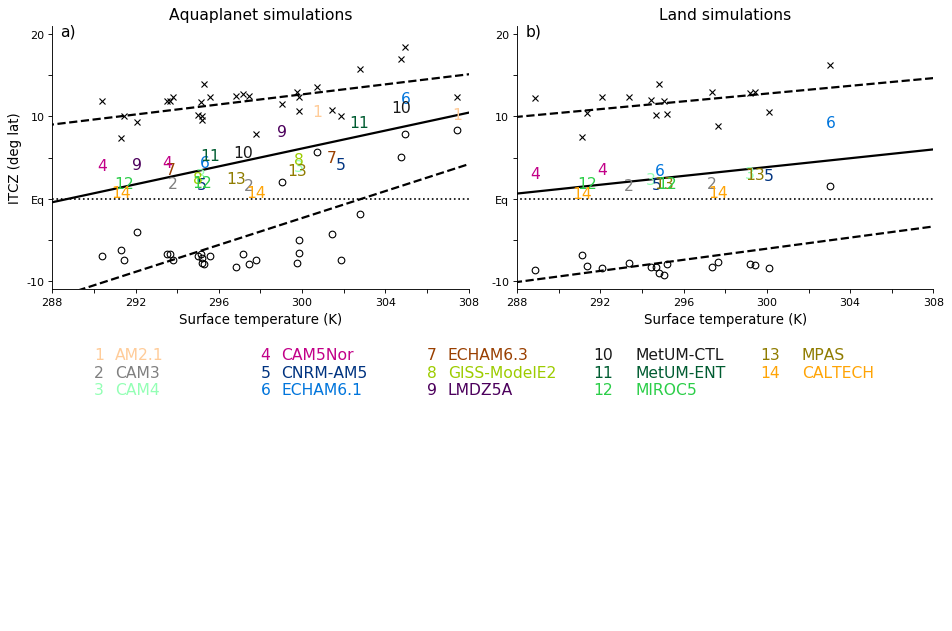

In [14]:
fig = plt.figure( figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k' )

ax = plt.subplot(2, 2, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#ax.spines['bottom'].set_position('zero')

plt.plot([200, 400], [0, 0], 'k:')
# crosses for seasonal excursions
for i in tm.modlist_aqct:
    plt.plot(ts_aqct[i], np.min(itcz_aqct_mm[i, :]), 'o', mec='k', mfc='none', mew=1)
    plt.plot(ts_aqct[i], np.max(itcz_aqct_mm[i, :]), 'x', mec='k', mfc='none', mew=1)
for i in tm.modlist_aq4x:
    plt.plot(ts_aq4x[i], np.min(itcz_aq4x_mm[i, :]), 'o', mec='k', mfc='none', mew=1)
    plt.plot(ts_aq4x[i], np.max(itcz_aq4x_mm[i, :]), 'x', mec='k', mfc='none', mew=1)
# model numbers
for i in tm.modlist_aqct:
    plt.text(ts_aqct[i], itcz_aqct_tm[i], tm.modnumbers[i], color=tm.modcolors[i], fontsize=14, \
    fontweight='normal', ha='center', va='center', backgroundcolor='none')
for i in tm.modlist_aq4x:
    plt.text(ts_aq4x[i], itcz_aq4x_tm[i], tm.modnumbers[i], color=tm.modcolors[i], fontsize=14, \
    fontweight='normal', ha='center', va='center', backgroundcolor='none')

plt.xlim(288, 308), plt.ylim(-11, 21)
plt.xlabel('Surface temperature (K)', fontsize=12)
plt.ylabel('ITCZ (deg lat)', fontsize=12)
plt.title('Aquaplanet simulations', fontsize=14)
ax.xaxis.set_ticks([288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308])
ax.xaxis.set_ticklabels([288, '', 292, '', 296, '', 300, '', 304, '', 308], fontsize=10)
ax.yaxis.set_ticks([-10, -5, 0, 5, 10, 15, 20])
ax.yaxis.set_ticklabels([-10, '', 'Eq', '', 10, '', 20], fontsize=10)
plt.text(0.02, 0.98, 'a)', fontsize=14, ha='left', va='center', transform=ax.transAxes)

# fit through annual-mean itcz and northern and southern seasonal excursions
# with respect to surface temperature
xfit = np.linspace(280, 320, 100)
xdata = np.concatenate((ts_aqct[tm.modlist_aqct], ts_aq4x[tm.modlist_aq4x]))
ydata = np.concatenate((itcz_aqct_tm[tm.modlist_aqct], itcz_aq4x_tm[tm.modlist_aq4x]))
r, b, corr, p, _ = spstats.linregress(xdata, ydata); plt.plot(xfit, r*xfit + b, 'k', linewidth=2)
print('Aqua, annual-mean:', r, p)
xdata = np.concatenate((ts_aqct[tm.modlist_aqct], ts_aq4x[tm.modlist_aq4x])) 
ydata =np.nanmin(np.concatenate((itcz_aqct_mm[tm.modlist_aqct], itcz_aq4x_mm[tm.modlist_aq4x])), axis=1)
r, b, corr, p, _ = spstats.linregress(xdata, ydata); plt.plot(xfit, r*xfit + b, 'k--', linewidth=2)
print('Aqua, southern edge:', r, p)
xdata = np.concatenate((ts_aqct[tm.modlist_aqct], ts_aq4x[tm.modlist_aq4x]))
ydata =np.nanmax(np.concatenate((itcz_aqct_mm[tm.modlist_aqct], itcz_aq4x_mm[tm.modlist_aq4x])), axis=1)
r, b, corr, p, _ = spstats.linregress(xdata, ydata); plt.plot(xfit, r*xfit + b, 'k--', linewidth=2)
print('Aqua, northern edge:', r, p)

ax = plt.subplot(2, 2, 2)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
#ax.spines['bottom'].set_position('zero')

plt.plot([200, 400], [0, 0], 'k:')
# crosses for seasonal excursions
for i in tm.modlist_ldct: 
    plt.plot(ts_ldct[i], np.min(itcz_ldct_mm[i, :]), 'o', mec='k', mfc='none', mew=1)
    plt.plot(ts_ldct[i], np.max(itcz_ldct_mm[i, :]), 'x', mec='k', mfc='none', mew=1)
for i in tm.modlist_ld4x:    
    plt.plot(ts_ld4x[i], np.min(itcz_ld4x_mm[i, :]), 'o', mec='k', mfc='none', mew=1)
    plt.plot(ts_ld4x[i], np.max(itcz_ld4x_mm[i, :]), 'x', mec='k', mfc='none', mew=1)
# model numbers
for i in tm.modlist_ldct:   
    plt.text(ts_ldct[i], itcz_ldct_tm[i], tm.modnumbers[i], color=tm.modcolors[i], fontsize=14, \
    fontweight='normal', ha='center', va='center', backgroundcolor='none')
for i in tm.modlist_ld4x:
    plt.text(ts_ld4x[i], itcz_ld4x_tm[i], tm.modnumbers[i], color=tm.modcolors[i], fontsize=14, \
    fontweight='normal', ha='center', va='center', backgroundcolor='none')
    
plt.xlim(288, 308), plt.ylim(-11, 21)
plt.xlabel('Surface temperature (K)', fontsize=12)
#plt.ylabel('ITCZ (deg lat)', fontsize=12)
plt.title('Land simulations', fontsize=14)
ax.xaxis.set_ticks([288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308])
ax.xaxis.set_ticklabels([288, '', 292, '', 296, '', 300, '', 304, '', 308], fontsize=10)
ax.yaxis.set_ticks([-10, -5, 0, 5, 10, 15, 20])
ax.yaxis.set_ticklabels([-10, '', 'Eq', '', 10, '', 20], fontsize=10)
plt.text(0.02, 0.98, 'b)', fontsize=14, ha='left', va='center', transform=ax.transAxes)

# fit through annual-mean itcz and northern and southern seasonal excursions
# with respect to surface temperature
xfit = np.linspace(280, 320, 100)
xdata = np.concatenate((ts_ldct[tm.modlist_ldct], ts_ld4x[tm.modlist_ld4x]))
ydata = np.concatenate((itcz_ldct_tm[tm.modlist_ldct], itcz_ld4x_tm[tm.modlist_ld4x]))
r, b, corr, p, _ = spstats.linregress(xdata, ydata); plt.plot(xfit, r*xfit + b, 'k', linewidth=2)
print('Land, annual-mean:', r, p)
xdata = np.concatenate((ts_ldct[tm.modlist_ldct], ts_ld4x[tm.modlist_ld4x]))
ydata =np.nanmin(np.concatenate((itcz_ldct_mm[tm.modlist_ldct], itcz_ld4x_mm[tm.modlist_ld4x])), axis=1)
r, b, corr, p, _ = spstats.linregress(xdata, ydata); plt.plot(xfit, r*xfit + b, 'k--', linewidth=2)
print('Land, southern edge:', r, p)
xdata = np.concatenate((ts_ldct[tm.modlist_ldct], ts_ld4x[tm.modlist_ld4x]))
ydata =np.nanmax(np.concatenate((itcz_ldct_mm[tm.modlist_ldct], itcz_ld4x_mm[tm.modlist_ld4x])), axis=1)
r, b, corr, p, _ = spstats.linregress(xdata, ydata); plt.plot(xfit, r*xfit + b, 'k--', linewidth=2)
print('Land, northern edge:', r, p)

ax = plt.subplot(2, 2, 3)
plt.xlim(0, 1), plt.ylim(0, 1)
plt.axis('off')
ystart=1.0
delta=0.0666
for m in tm.modlist_aqct:
    if np.int(tm.modnumbers[m])<4:
        plt.text(0.1, ystart-delta*np.float(tm.modnumbers[m]), tm.modnumbers[m], color=tm.modcolors[m], fontsize=14)
        plt.text(0.15, ystart-delta*np.float(tm.modnumbers[m]), tm.modnames_4plots[m], color=tm.modcolors[m], fontsize=14)
    elif np.int(tm.modnumbers[m])<7:
        plt.text(0.5, ystart-delta*(np.float(tm.modnumbers[m])-3), tm.modnumbers[m], color=tm.modcolors[m], fontsize=14)
        plt.text(0.55, ystart-delta*(np.float(tm.modnumbers[m])-3), tm.modnames_4plots[m], color=tm.modcolors[m], fontsize=14)
    elif np.int(tm.modnumbers[m])<10:
        plt.text(0.9, ystart-delta*(np.float(tm.modnumbers[m])-6), tm.modnumbers[m], color=tm.modcolors[m], fontsize=14)
        plt.text(0.95, ystart-delta*(np.float(tm.modnumbers[m])-6), tm.modnames_4plots[m], color=tm.modcolors[m], fontsize=14)
    elif np.int(tm.modnumbers[m])<13:
        plt.text(1.3, ystart-delta*(np.float(tm.modnumbers[m])-9), tm.modnumbers[m], color=tm.modcolors[m], fontsize=14)
        plt.text(1.4, ystart-delta*(np.float(tm.modnumbers[m])-9), tm.modnames_4plots[m], color=tm.modcolors[m], fontsize=14)
    elif np.int(tm.modnumbers[m])<15:
        plt.text(1.7, ystart-delta*(np.float(tm.modnumbers[m])-12), tm.modnumbers[m], color=tm.modcolors[m], fontsize=14)
        plt.text(1.8, ystart-delta*(np.float(tm.modnumbers[m])-12), tm.modnames_4plots[m], color=tm.modcolors[m], fontsize=14)


plt.tight_layout()
plt.savefig('figs/corrigendumpaper_figure14.pdf')